In [276]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [10]:
import gym
import numpy as np
import matplotlib as plt
import random

In [350]:
class SailingEnv(gym.Env):
    def __init__(self, max_steps=20, alpha=0.1, gamma=0.9, epsilon=0.9):
        self.action_space = gym.spaces.Discrete(16)
        self.observation_space = gym.spaces.Box(low=np.array([0, 0]), high=np.array([20, 20]), dtype=np.float32)
        self.wind_directions = np.linspace(0, np.pi, 10)
        self.sail_angles = np.linspace(-np.pi/4, np.pi/4, 16)
        self.sail_angle = 0
        #self.boat_position = np.random.randint(90, size=(1, 2))[0]
        #self.target_position = np.array([35, 69])
        self.max_steps = max_steps
        self.current_step = 0
        self.alpha = alpha
        self.gamma = gamma 
        self.epsilon = epsilon
        #self.q_table = self.q_table = np.zeros((10, 16, 21, 21, 91)) 
        #q_table is a 5-dimensional NumPy array used to store the Q-values for each 
        #state-action pair in the environment. Here is what each dimension represents:
        #The first dimension corresponds to the 10 possible wind directions that the boat can encounter during the episode.
        #The second to the 16 possible sail angles that the boat can choose in each time step.
        #The third to the boat's x-position, which can range from 0 to 20.
        #The fourth to the boat's y-position, which can range from 0 to 20.
        #The fifth is the manhattan distance between the boat and the target (The Manhattan distance is an appropriate metric to use because it 
        # measures the shortest path that the boat can take to reach the target position, if the boat is only allowed to move vertically or 
        # #horizontally, but not diagonally.)
        #self.q_table = np.random.uniform(low=-4, high=0, size=(10, 21, 21, 16))
        
    def reset(self):
        self.wind_direction = np.random.choice(self.wind_directions)        
        self.sail_angle = 0
        self.boat_position = np.random.randint(20, size=(1, 2))[0]
        self.target_position = np.array([6, 9])
        self.current_step = 0
        #print(f"arxikh position={self.boat_position}, target={self.target_position}")
        return np.where(self.wind_direction==self.wind_directions)[0][0], self.boat_position[0], self.boat_position[1]
    
    def step(self, action):
        #assert self.action_space.contains(action)

        # Update the boat's position based on the chosen sail angle and wind direction
        self.sail_angle = self.sail_angles[action]
        heading = np.arctan2(np.sin(self.wind_direction - self.sail_angle), np.cos(self.wind_direction - self.sail_angle))
        velocity = np.array([np.cos(heading), np.sin(heading)])
        #print(f"velocity={velocity}")
        self.boat_position = (np.round(self.boat_position + velocity,2)).astype(int)

        # Calculate the reward and check if the episode is done
        distance_to_target = np.linalg.norm(self.boat_position - self.target_position)
        
        self.current_step += 1
        done = False
        truncated = False
        reward = -0.5
        if self.current_step >= self.max_steps or self.boat_position[0]<0 or self.boat_position[0]>20 or self.boat_position[1]<0 or self.boat_position[1]>20: #or not np.any(np.round(self.boat_velocity,2)): #checks whether any element of the rounded self.boat_velocity array is non-zero.
            truncated = True    
     
        if distance_to_target < 0.5:
            reward = 100
            #print(distance_to_target)
            done = True
        #reward, done = self.calculate_reward()
        # Update the wind direction for the next time step
        #self.wind_direction = np.random.choice(self.wind_directions)
        #return new_wind_direction
        #print(f"{self.current_step}-th step: new position={self.boat_position}")
        # Return the new observation, reward, and done flag
        #observation = self.get_observation()
        return  np.where(self.wind_direction==self.wind_directions)[0][0],  self.boat_position[0], self.boat_position[1], reward, done, truncated


In [351]:
q_table=np.random.uniform(low=-2, high=0, size=(10, 21, 21, 16))

In [352]:
env = SailingEnv()
EPISODES=100
boat_plot=[]
boat_plot_all_ep=[] #stores all episodes' movement
dones=np.zeros(EPISODES)
for i in range(EPISODES):
    env = SailingEnv()
    current_state=env.reset()
    
    while True:
        sail_index=np.argmax(q_table[current_state])
        #action based on q table

        #print(action)
        #step
        wd, x, y, reward, done, truncated = env.step(sail_index)
       
        new_state=(wd,x,y)
        #times to q table
        if truncated==True:
            print(f"{i}-th ep -> Egina truncated sto {env.current_step}-th step. x,y={x,y}")
            break
              #Qmax: apo ton mh ananewmeno pinaka, vriskw to megisto Q gia to 
        Q_max = np.max(q_table[new_state])
        #Q: apo thn mhn ananewmeno pinaka, to Q to gia state kai to action poy phra
        Q_current=q_table[current_state + (sail_index,)]
        #eq
        new_q=(1-env.alpha) * Q_current + env.alpha * (reward + env.gamma * Q_max)
        #update Q table
        q_table[current_state + (sail_index,)] = new_q 

        boat_plot=np.append(boat_plot,(x,y))
        if done==True:
            #print(f"{i}-th ep -> Egina done sto {env.current_step}-th step.x,y={x,y}")
            dones[i]=1
            break        
 
            
  
        current_state=new_state
    boat_plot_all_ep.append(boat_plot)
#render_ep(boat_plot_all_ep[5], True)

0-th ep -> Egina truncated sto 11-th step. x,y=(-1, 16)
1-th ep -> Egina truncated sto 20-th step. x,y=(0, 7)
2-th ep -> Egina truncated sto 20-th step. x,y=(0, 0)
3-th ep -> Egina truncated sto 20-th step. x,y=(19, 17)
6-th ep -> Egina truncated sto 20-th step. x,y=(14, 11)
7-th ep -> Egina truncated sto 20-th step. x,y=(0, 7)
8-th ep -> Egina truncated sto 20-th step. x,y=(0, 20)
9-th ep -> Egina truncated sto 20-th step. x,y=(19, 13)
10-th ep -> Egina truncated sto 20-th step. x,y=(0, 14)
11-th ep -> Egina truncated sto 20-th step. x,y=(4, 8)
12-th ep -> Egina truncated sto 20-th step. x,y=(11, 8)
13-th ep -> Egina truncated sto 20-th step. x,y=(1, 0)
14-th ep -> Egina truncated sto 20-th step. x,y=(0, 9)
15-th ep -> Egina truncated sto 20-th step. x,y=(0, 0)
16-th ep -> Egina truncated sto 6-th step. x,y=(-1, 13)
17-th ep -> Egina truncated sto 20-th step. x,y=(0, 6)
18-th ep -> Egina truncated sto 20-th step. x,y=(14, 4)
19-th ep -> Egina truncated sto 20-th step. x,y=(0, 14)
20-t

In [353]:
dones

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

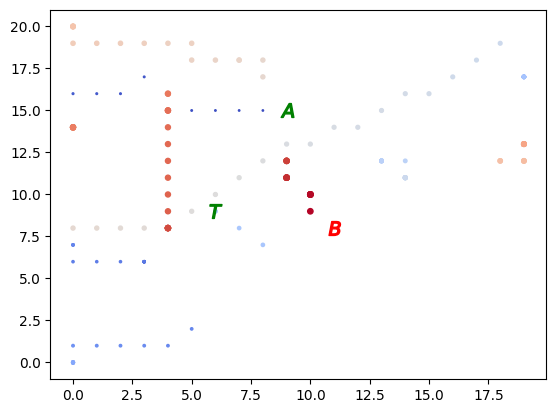

In [358]:
render_ep(boat_plot_all_ep[12], True)

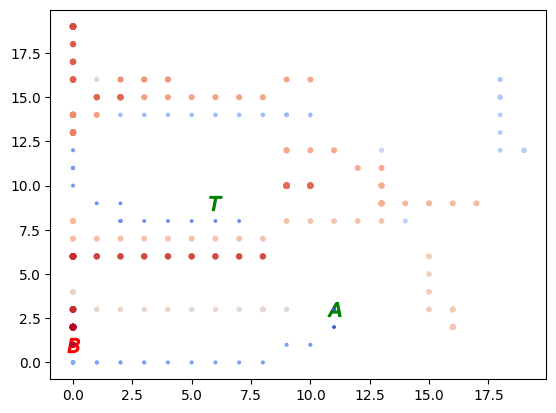

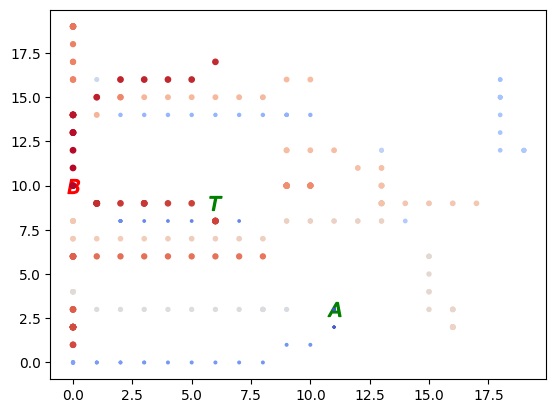

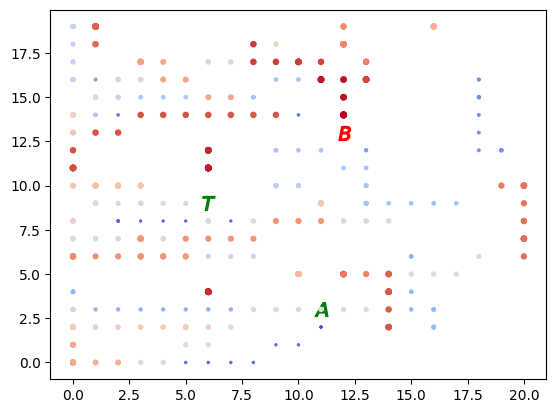

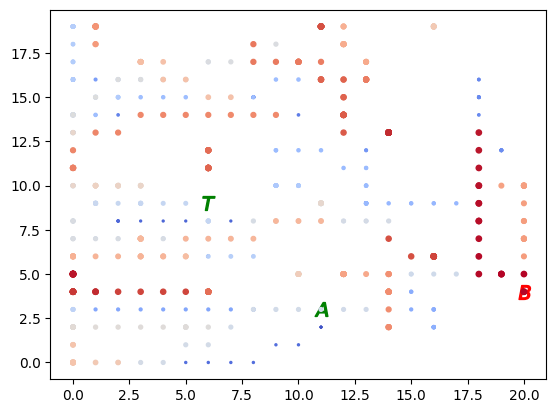

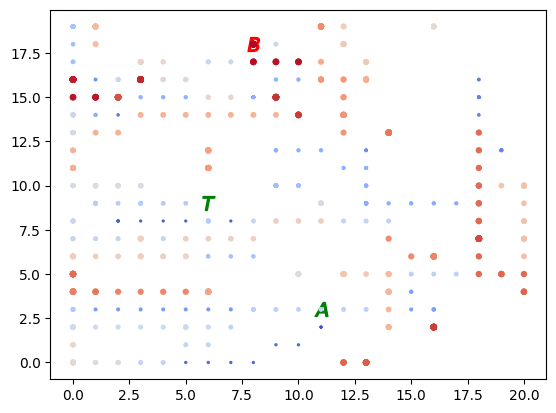

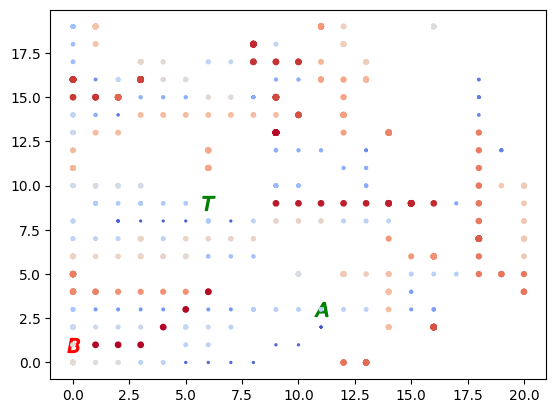

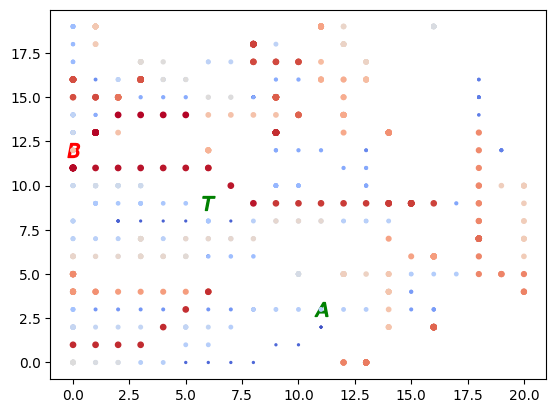

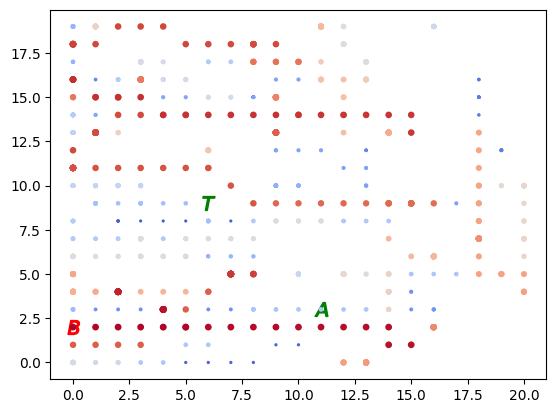

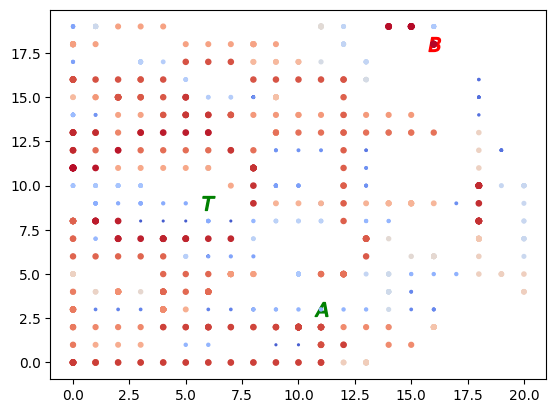

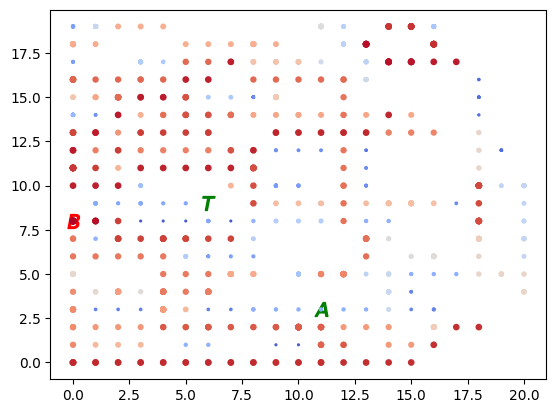

In [349]:
for i in sorted(random.sample(range(0,EPISODES),10)):
    
    render_ep(boat_plot_all_ep[i], True)

In [92]:
def render_ep (boat_plot, target=False):
    from matplotlib import pyplot as plt
    #true wind vector
    #plt.figure(figsize=(10, 6), dpi=200)
    #define plots
#    fig, ax = plt.subplots()

#     #define coordinates and directions
#     if tw_vec.all!=0:
#         x = 1
#         y = 0.02
#         u = tw_vec[0]
#         v = tw_vec[1]
#     #sail angle   
#     if sail_angle.all!=0:
#         x1 = 5        
#         u1 = sail_angle[0]
#         v1 = sail_angle[1]
#         sail=ax.quiver(x1, y, u1, v1, color='blue')
#         ax.plot([], [], color='blue', label="boat heading")

#     #create quiver plot
#     wind=ax.quiver(x, y, u, v, color='black')
#     ax.plot([], [], color='black', label="wind")

    #starting point
    #target point
    #PENDING: spline connecting each point
    
    boat_plot=np.split(boat_plot,len(boat_plot)/2)
    #boat_plot=np.split(boat_plot,len(boat_plot)/2)
    boat_plot=np.array(boat_plot)
    #for plotting starting point with different symbol
    start=boat_plot[0]
    #for plotting ending point with different symbol
    end=boat_plot[-1]
    #keeping all in between points
    boat_plot=boat_plot[1:-1]
    #boat_plot=boat_plot[0::50]
    # Scatter plot
    #light blue -> darker blue 
    target_plot=env.target_position
    x=boat_plot[:, 0]
    y=boat_plot[:, 1]
    weights = np.arange(1,boat_plot[:, 1].shape[0]+1)
    
    points_size=np.linspace(1,15,len(boat_plot))
    
    #plt.scatter(figsize=(5, 5))
    plt.scatter(start[0], start[1], marker="$A$",  c='green', s=100)
    plt.scatter(end[0], end[1], marker="$B$",  c='red', s=100)
    plt.scatter(x, y, c=weights, cmap='coolwarm' ,s=points_size)
    #plt.title(f"{index}-th episode")
    if target==True:
        plt.scatter(target_plot[0], target_plot[1], marker="$T$",  c='green', s=100)
    # Display the plot
    #from matplotlib.pyplot import figure

    #ax.legend()
    
    #plt.xlim(2*min(x),2*max(x))
    #plt.ylim(2*min(y),2*max(y))
    #plt.xlim(11,15)
    #plt.ylim(0,0.5)
    plt.show()

In [23]:
class SailingEnv(gym.Env):
    def step_and_update_q_table(self, action, state):
        next_state, reward, done, _ = self.step(action)
        next_wind_direction_idx = np.random.choice(self.wind_directions)
        next_state = (self.manhattan_distance(next_state, self.target_position), next_state[0], next_state[1], next_wind_direction_idx)
        next_max_q_value = np.max(self.q_table[next_state])
        td_error = reward + self.gamma * next_max_q_value - self.q_table[state][action]
        self.q_table[state][action] += self.alpha * td_error
        state = next_state
        self.epsilon = self.min_exploration_rate + (self.max_exploration_rate - self.min_exploration_rate) * np.exp(-self.exploration_decay_rate * episode)
        return next_state, reward, done, _

    def run_episodes(self, num_episodes):
        episode_rewards = []
        for episode in range(num_episodes):
            state = self.reset()
            episode_reward = 0
            while True:
                if np.random.uniform(0, 1) < self.epsilon:
                    action = self.action_space.sample()
                else:
                    action = np.argmax(self.q_table[state])
                next_state, reward, done, _ = self.step_and_update_q_table(action, state)
                state = next_state
                episode_reward += reward
                if done:
                    break
            episode_rewards.append(episode_reward)
            self.epsilon = self.min_exploration_rate + (self.max_exploration_rate - self.min_exploration_rate) * np.exp(-self.exploration_decay_rate * episode)
        return episode_rewards
    

